1. Setup `Python` and `Docker` on the device.

    ```bash
    apt update
    apt install curl
    apt install python3
    curl https://bootstrap.pypa.io/get-pip.py -o get-pip.py
    python get-pip.py
    curl -fsSL https://get.docker.com -o get-docker.sh
    sh get-docker.sh
    ```

2. Run following commands to run `Ollama` and pull LLM models.

    ```bash
    docker run -d -p 0.0.0.0:11434:11434 --name ollama ollama/ollama
    docker exec -it ollama ollama pull gemma:2b
    docker exec -it ollama ollama pull gemma:7b
    docker exec -it ollama ollama pull llama2:7b
    docker exec -it ollama ollama pull mistral:7b
    ```

3. Install langchain python library.

    ```bash
    pip install langchain
    pip install langchain-community
    ```

4. Then execute the python notebook to test the performance.


In [ ]:
# LangChain supports many other chat models. Here, we're using Ollama
from langchain_community.chat_models import ChatOllama
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

# supports many more optional parameters. Hover on your `ChatOllama(...)`
# class to view the latest available supported parameters
llm = ChatOllama(model="gemma:2b")
prompt = ChatPromptTemplate.from_template("Tell me a short joke about {topic}")

# using LangChain Expressive Language chain syntax
# learn more about the LCEL on
# /docs/expression_language/why
chain = prompt | llm | StrOutputParser()

# for brevity, response is printed in terminal
# You can use LangServe to deploy your application for
# production
print(chain.invoke({"topic": "Space travel"}))

In [2]:
import time
import json

models = ["gemma:2b", "gemma:7b", "llama2:7b", "mistral:7b"]

topics = [
  "Climate Change",
  "Artificial Intelligence",
  "Future of Work",
  "Cybersecurity",
  "Mental Health",
  "Sustainable Living",
  "Deep Space Exploration",
  "Virtual Reality",
  "Ancient Mysteries",
  "True Crime"
]

def invoke(model, topic):
    llm = ChatOllama(model=model)
    prompt = ChatPromptTemplate.from_template("Tell me a short joke about {topic}")
    chain = prompt | llm | StrOutputParser()
    return chain.invoke({"topic": topic})


In [ ]:
times = {}
i = 1
n = len(models) * len(topics)
for model in models:
  times[model] = []
  for topic in topics:
      print("\r" + " " * 80 + f"\rInvoking {model} on {topic} ({i}/{n})", end="")
      start = time.time()
      invoke(model, topic)
      end = time.time()
      times[model].append(end - start)
      i += 1

with open("summary.json", "w") as f:
    json.dump(times, f)

print("\rSuccessfully saved summary to summary.json!")

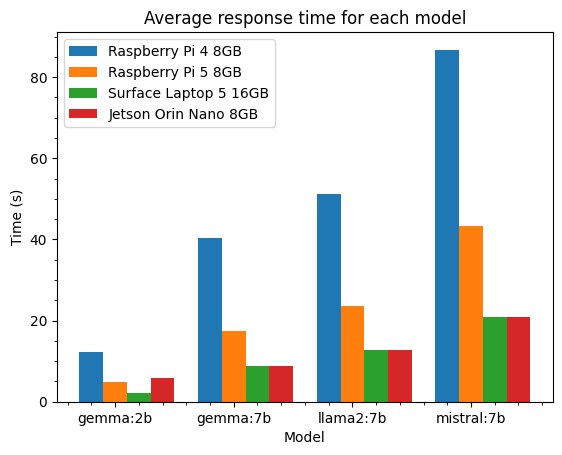

In [3]:
import json
import matplotlib.pyplot as plt


with open("summary1.json", "r") as f:
    rpi4 = json.load(f)

with open("summary2.json", "r") as f:
    rpi5 = json.load(f)

with open("summary3.json", "r") as f:
    intel = json.load(f)

with open("summary4.json", "r") as f:
    orin = json.load(f)

models = ["gemma:2b", "gemma:7b", "llama2:7b", "mistral:7b"]

rpi4_avg = {model: sum(rpi4[model][1:]) / len(rpi4[model][1:]) for model in models}
rpi5_avg = {model: sum(rpi5[model][1:]) / len(rpi5[model][1:]) for model in models}
intel_avg = {model: sum(intel[model][1:]) / len(intel[model][1:]) for model in models}
orin_avg = {model: sum(orin[model][1:]) / len(orin[model][1:]) for model in models}

fig, ax = plt.subplots()
bar_width = 0.2
bar_positions = range(len(models))
rpi4_bars = ax.bar([pos - bar_width for pos in bar_positions], rpi4_avg.values(), bar_width, label="Raspberry Pi 4 8GB")
rpi5_bars = ax.bar([pos for pos in bar_positions], rpi5_avg.values(), bar_width, label="Raspberry Pi 5 8GB")
intel_bars = ax.bar([pos + bar_width for pos in bar_positions], intel_avg.values(), bar_width, label="Surface Laptop 5 16GB")
orin_bars = ax.bar([pos + 2 * bar_width for pos in bar_positions], orin_avg.values(), bar_width, label="Jetson Orin Nano 8GB")
ax.set_xticks(bar_positions)
ax.set_xticklabels(models)
# show minor ticks
ax.minorticks_on()
ax.set_xlabel("Model")
ax.set_ylabel("Time (s)")
ax.set_title("Average response time for each model")
ax.legend()

plt.show()